In [150]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from matplotlib import colors

In [151]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [2]:
# Загрузим тестовый датасет про ирисы
iris = load_iris()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
# Превратим его в датафрейм пандас, удалим ненужные нам признаки
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.drop(['petal length (cm)', 'petal width (cm)'], inplace=True, axis=1)

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [13]:
# Разделим фрейм на тестовый и обучающий, также сделаем с целевой переменной
df_train, df_test = train_test_split(df, test_size=0.2)
y_train, y_test = df_train['class'], df_test['class']
del df_train['class']
del df_test['class']

In [17]:
# Инициализируем дискриминатный анализ, обучим выборку
lda = LinearDiscriminantAnalysis()
lda.fit(df_train, y_train)

LinearDiscriminantAnalysis()

In [21]:
# Попробуем сделать предсказание класса, затем сравним результаты предсказания с реальностью
lda.predict(df_test)
result = pd.DataFrame([y_test.values, lda.predict(df_test)]).T
result

,0,1
0,0,0
1,0,0
2,2,2
3,1,1
4,1,2
5,1,1
6,1,1
7,0,0
8,2,1
9,0,0


In [24]:
accuracy_score(y_test, lda.predict(df_test))

0.7

Точность нашей модели оставляет желать лучшего. Лучше добавить ещё хотя бы один признак. 

In [93]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.drop(['petal length (cm)'], inplace=True, axis=1)

df_train, df_test = train_test_split(df, test_size=0.2)
y_train, y_test = df_train['class'], df_test['class']
del df_train['class']
del df_test['class']

lda.fit(df_train, y_train)
accuracy_score(y_test, lda.predict(df_test))

0.9333333333333333

Уже значительно лучше, но если оставить все признаки, то получим наиболее качественную модель: 

In [139]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

df_train, df_test = train_test_split(df, test_size=0.2)
y_train, y_test = df_train['class'], df_test['class']
del df_train['class']
del df_test['class']

lda.fit(df_train, y_train)
accuracy_score(y_test, lda.predict(df_test))

1.0

Вернёмся к первоначальной выборке: 

In [172]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.drop(['petal length (cm)', 'petal width (cm)'], inplace=True, axis=1)

df_train, df_test = train_test_split(df, test_size=0.2)
y_train, y_test = df_train['class'], df_test['class']
del df_train['class']
del df_test['class']

lda.fit(df_train, y_train)
accuracy_score(y_test, lda.predict(df_test))

0.8666666666666667

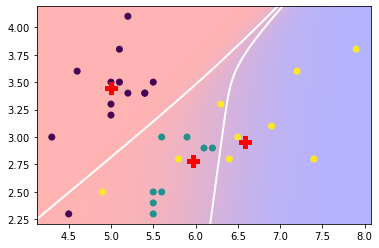

In [183]:
plt.scatter(df_test['sepal length (cm)'], df_test['sepal width (cm)'], c=y_test)
# Проставим центры масс:
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='P')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

#Какая то скопипастенная магия, по аналогии для 2 классов сделаем выведение дискриминантной функции для 3 классов:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Y = Z[:, 0].reshape(xx.shape)
Z = Z[:, 2].reshape(xx.shape)

plt.pcolormesh(xx, yy, Y, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Y, [0.5], linewidths=2., colors='white')

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [173]:
# Вернем первоначальный датафрейм без класса: 
df.drop('class', inplace=True, axis=1)

In [176]:
# Нормализуем все признаки: 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

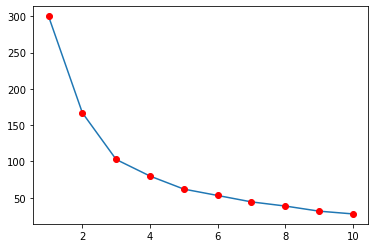

In [181]:
# Призовём к-средние: 
from sklearn.cluster import KMeans

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Видно, что после 3 кластера в данном случае - оптимально. Ну оно и логично :) 

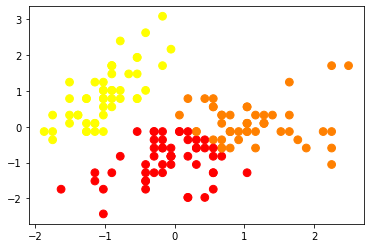

In [185]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)